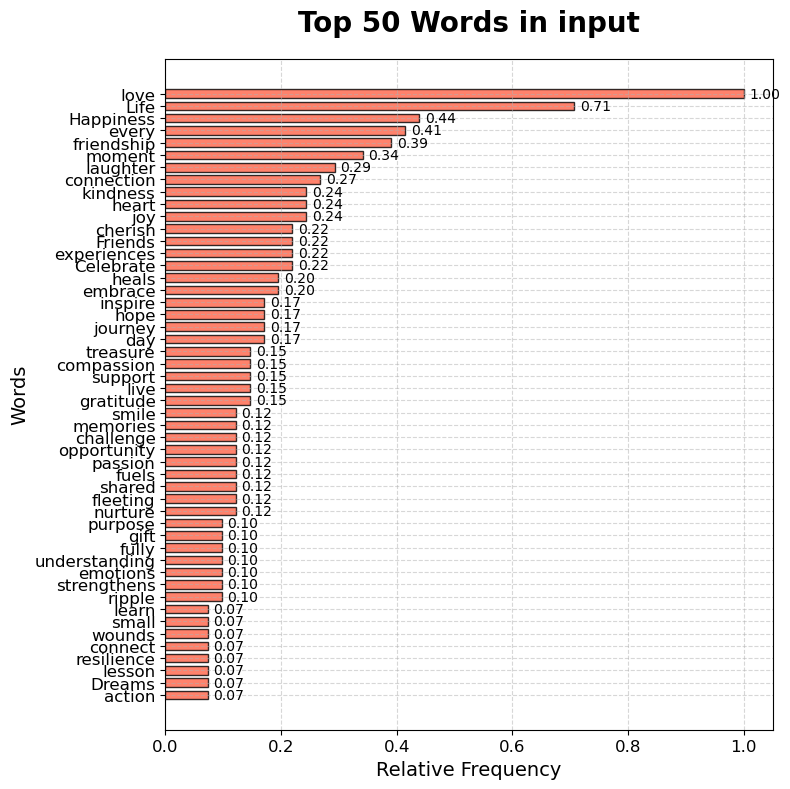

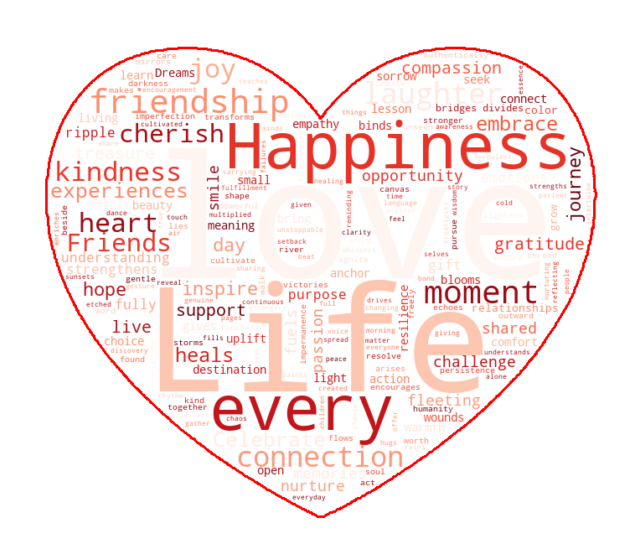

워드클라우드 이미지가 'wordcloud.png'로 저장되었습니다!


In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

text_file = "input.txt" 
output_file = "wordcloud.png" 
mask_file = "heart.png"

if not os.path.exists(text_file):
    raise FileNotFoundError(f"{text_file} 파일이 존재하지 않습니다. 먼저 텍스트를 준비해주세요.")

with open(text_file, "r", encoding="utf-8") as file:
    text = file.read()

custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    "like", "would", "one", "also", "get", "us", "can", "make", "even", "s"
])

wc = WordCloud(
    background_color="white",
    max_words=200,
    stopwords=custom_stopwords,
    colormap='Reds',
    mask=np.array(Image.open(mask_file)),
    contour_width=2,                      
    contour_color='red'    
)

wc.generate(text)
word_freq = wc.words_

top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:50])

plt.figure(figsize=(8,8))

# 색상, 막대 너비, alpha 조절
bars = plt.barh(list(top_words.keys())[::-1],
                list(top_words.values())[::-1],
                color='tomato',
                edgecolor='black',
                height=0.7,
                alpha=0.8)

# 제목/축 라벨
plt.title("Top 50 Words in input", fontsize=20, weight='bold', pad=20)
plt.xlabel("Relative Frequency", fontsize=14)
plt.ylabel("Words", fontsize=14)

# x축 눈금
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# x축 grid 추가
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 값 표시 (막대 끝에 상대빈도 값)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

wc.to_file(output_file)
print(f"워드클라우드 이미지가 '{output_file}'로 저장되었습니다!")